In [ ]:
# 데이터 대충 auto tag 하는 방법이니 시간이 많다면 추천하지 않음

In [1]:
import os
from PIL import Image
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [ ]:
# 15 open_eye 16 close_eye 17 awake  18 drowsy

### data_1

In [ ]:
#data_1 은 감은눈/ 뜬눈 있는 흑백사진 각 2천장 

In [ ]:
# https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset 

In [ ]:
# testing

In [6]:
path_dir = 'dataset/data_1/Open_Eyes'
file_list = os.listdir(path_dir)

In [7]:
len(file_list)

2000

In [12]:
file_list[0][:-4]

's0001_02334_0_0_1_0_0_01'

In [18]:
with open('data/labels/'+"foo.txt", "w") as f:
    f.write("15 0.506024 0.506024 0.987952 0.987952")

In [ ]:
# open

In [19]:
path_dir = 'dataset/data_1/Open_Eyes'
file_list = os.listdir(path_dir)
for file_name in file_list:
    with open('data/labels/'+str(file_name[:-4])+".txt", "w") as f:
        f.write("15 0.506024 0.506024 0.987952 0.987952")

In [ ]:
# close

In [20]:
path_dir = 'dataset/data_1/Closed_Eyes'
file_list = os.listdir(path_dir)
for file_name in file_list:
    with open('data/labels/'+str(file_name[:-4])+".txt", "w") as f:
        f.write("16 0.505814 0.505814 0.988372 0.988372")

### data_2

In [ ]:
# data_2는 감은눈/ 뜬눈 있는 컬러 사진 각 109개

In [ ]:
# https://www.kaggle.com/datasets/serenaraju/yawn-eye-dataset-new

In [ ]:
# open

In [21]:
path_dir = 'dataset/data_2/Open_Eyes'
file_list = os.listdir(path_dir)
for file_name in file_list:
    with open('data/labels/'+str(file_name[:-4])+".txt", "w") as f:
        f.write("""15 0.503448 0.503448 0.993103 0.993103
""")

In [ ]:
# close

In [22]:
path_dir = 'dataset/data_2/Closed_Eyes'
file_list = os.listdir(path_dir)
for file_name in file_list:
    with open('data/labels/'+str(file_name[:-4])+".txt", "w") as f:
        f.write("""16 0.503448 0.503448 0.993103 0.993103
""")

### data_3

In [ ]:
#data_3 은 졸린사진/ 안졸린사진 얼굴만/ 총 약 4만장

In [ ]:
# https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd

In [ ]:
# awake

In [23]:
path_dir = 'dataset/data_3/Awake'
file_list = os.listdir(path_dir)
for file_name in file_list:
    with open('data/labels/'+str(file_name[:-4])+".txt", "w") as f:
        f.write("""17 0.502203 0.502203 0.995595 0.995595
""")

In [ ]:
# drowsy

In [24]:
path_dir = 'dataset/data_3/Drowsy'
file_list = os.listdir(path_dir)
for file_name in file_list:
    with open('data/labels/'+str(file_name[:-4])+".txt", "w") as f:
        f.write("""18 0.502203 0.502203 0.995595 0.995595
""")

## testing --------------------------------------------------------------------------

In [25]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\34346/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-6-2 Python-3.8.8 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [32]:
path_dir = 'dataset/data_4/Awake'
file_list = os.listdir(path_dir)
path = path_dir + "/"+file_list[0]

In [33]:
path

'dataset/data_4/Awake/image_0 (10).jpg'

In [34]:
image_pil = Image.open(path)
img = np.array(image_pil)

In [35]:
results = model(img)
results.print()

image 1/1: 480x640 1 person, 2 cars
Speed: 6.0ms pre-process, 219.4ms inference, 12.0ms NMS per image at shape (1, 3, 480, 640)


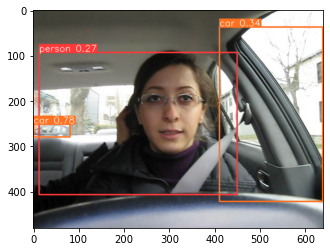

In [36]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [58]:
results.xywhn

[tensor([[0.06542, 0.55266, 0.12518, 0.05937, 0.77865, 2.00000],
         [0.82146, 0.47769, 0.35585, 0.80100, 0.33995, 2.00000],
         [0.36287, 0.52037, 0.68313, 0.65253, 0.27430, 0.00000]], device='cuda:0')]

In [61]:
for i in results.xywhn[0]:
    if i[-1] == 0: 
        a = list(i[0:4])

In [65]:
import re

numbers = re.findall(r'\d+', str(a))


['0', '36287', '0', '0', '52037', '0', '0', '68313', '0', '0', '65253', '0']


In [68]:
print(str(numbers[0]+'.'+numbers[1]+' '+numbers[3]+'.'+numbers[4]+' '+numbers[6]+'.'+numbers[7]+' '+numbers[9]+'.'+numbers[10]))

0.36287 0.52037 0.68313 0.65253


### data_4

In [ ]:
#data_4는 졸린사진/안졸린사진 상체만 /총 약 1만장  4번은 yolo로 한번 찾아야 함.

In [ ]:
# https://www.kaggle.com/datasets/rakibuleceruet/drowsiness-prediction-dataset

In [ ]:
# awake

In [71]:
path_dir = 'dataset/data_4/Awake'
file_list = os.listdir(path_dir)
for file_name in file_list:
    path = path_dir + "/"+ file_name
    image_pil = Image.open(path)
    img = np.array(image_pil)
    results = model(img)
    for i in results.xywhn[0]:
        if i[-1] == 0: 
            a = list(i[0:4])
    numbers = re.findall(r'\d+', str(a))
    string_ = str(numbers[0]+'.'+numbers[1]+' '+numbers[3]+'.'+numbers[4]+' '+numbers[6]+'.'+numbers[7]+' '+numbers[9]+'.'+numbers[10])
    string_ = "17 " + string_
    
    
    
    with open('data/labels/'+str(file_name[:-4])+".txt", "w") as f:
        f.write(string_)

In [ ]:
# Drowsy

In [72]:
path_dir = 'dataset/data_4/Drowsy'
file_list = os.listdir(path_dir)
for file_name in file_list:
    path = path_dir + "/"+ file_name
    image_pil = Image.open(path)
    img = np.array(image_pil)
    results = model(img)
    for i in results.xywhn[0]:
        if i[-1] == 0: 
            a = list(i[0:4])
    numbers = re.findall(r'\d+', str(a))
    string_ = str(numbers[0]+'.'+numbers[1]+' '+numbers[3]+'.'+numbers[4]+' '+numbers[6]+'.'+numbers[7]+' '+numbers[9]+'.'+numbers[10])
    string_ = "18 " + string_
    
    
    
    with open('data/labels/'+str(file_name[:-4])+".txt", "w") as f:
        f.write(string_)

### data_5

In [ ]:
### data_5는 컬러사진 상체 /총 약 2천장  5번은 yolo로 한번 찾아야 함.

In [ ]:
# data_2와 같은 출처 / https://www.kaggle.com/datasets/serenaraju/yawn-eye-dataset-new

In [ ]:
# Awake

In [73]:
path_dir = 'dataset/data_5/Awake'
file_list = os.listdir(path_dir)
for file_name in file_list:
    path = path_dir + "/"+ file_name
    image_pil = Image.open(path)
    img = np.array(image_pil)
    results = model(img)
    for i in results.xywhn[0]:
        if i[-1] == 0: 
            a = list(i[0:4])
    numbers = re.findall(r'\d+', str(a))
    string_ = str(numbers[0]+'.'+numbers[1]+' '+numbers[3]+'.'+numbers[4]+' '+numbers[6]+'.'+numbers[7]+' '+numbers[9]+'.'+numbers[10])
    string_ = "17 " + string_
    
    
    
    with open('data/labels/'+str(file_name[:-4])+".txt", "w") as f:
        f.write(string_)

In [ ]:
# Drowsy

In [74]:
path_dir = 'dataset/data_5/Drowsy'
file_list = os.listdir(path_dir)
for file_name in file_list:
    path = path_dir + "/"+ file_name
    image_pil = Image.open(path)
    img = np.array(image_pil)
    results = model(img)
    for i in results.xywhn[0]:
        if i[-1] == 0: 
            a = list(i[0:4])
    numbers = re.findall(r'\d+', str(a))
    string_ = str(numbers[0]+'.'+numbers[1]+' '+numbers[3]+'.'+numbers[4]+' '+numbers[6]+'.'+numbers[7]+' '+numbers[9]+'.'+numbers[10])
    string_ = "18 " + string_
    
    
    
    with open('data/labels/'+str(file_name[:-4])+".txt", "w") as f:
        f.write(string_)